In [16]:
import numpy as np 
import matplotlib.pyplot as plt
import math 
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


url = "https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv"

dataset = pd.read_csv(url, sep=',')

print("\nExistencia de datos nulos:\n")
print(dataset.isnull().sum())

print("\nInformación del csv:\n")
print(dataset.info())

print("\nPrimeros 5 datos:\n")
dataset.head()



Existencia de datos nulos:

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

Información del csv:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None

Primeros 5 datos:



,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [33]:
dataset.columns = ['ID','TV', 'Radio', 'Newspaper', 'Sales']

dataset.head()

#Entrenar modelo.
scaler = StandardScaler()
x = dataset[['TV','Radio','Newspaper']]
y = dataset['Sales']
x_scaled = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(x_train,y_train)

y_pred = model.predict(x_test)

#Evaluacion del modelo

r2 = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

print(f"R2: {r2:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

#Coeficiente

coef = {
    'TV': model.coef_[0],
    'Radio': model.coef_[1],
    'Newspaper': model.coef_[2]
}

print("\nCoeficientes:\n")
for feature, value in coef.items():
    print(f"{feature}: {value:.4f}")





R2: 0.90
MAE: 1.46
MSE: 3.17
RMSE: 1.78

Coeficientes:

TV: 3.8306
Radio: 2.8019
Newspaper: 0.0600


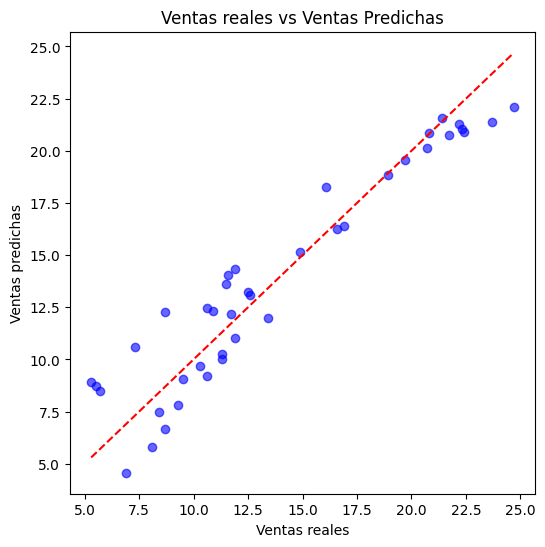

In [52]:
#Visualizacion
plt.figure(figsize=(6,6))
plt.scatter(y_test,y_pred, color='blue',alpha=0.6)
plt.xlabel("Ventas reales")
plt.ylabel("Ventas predichas")
plt.title("Ventas reales vs Ventas Predichas")

plt.plot([y_test.min(), y_test.max()],[y_test.min(),y_test.max()],'r--')



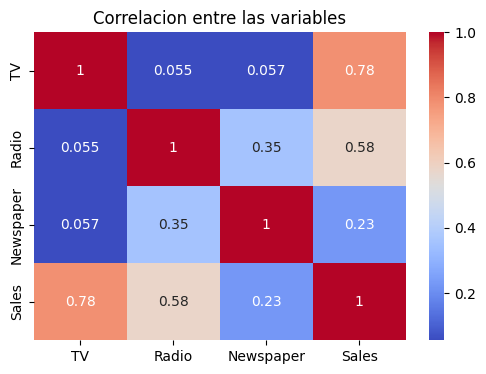

In [ ]:
import seaborn as sns
#Tabla de correlacion para poder realizar las predicciones y escoger nuevos valores
plt.figure(figsize=(6,4))
sns.heatmap(dataset[['TV','Radio','Newspaper','Sales']].corr(), annot=True,cmap='coolwarm')
plt.title("Correlacion entre las variables")
plt.show()

In [ ]:
#Predicciones

#Segun el gráfico de correlacion si aumenta gastos en TV las ventas aumentan tambien
#Si aumenta gastos en radio las ventas tambien aumentan aunque no tanto como hacerlo con TV
#Si aumenta gastos en periodicos las ventas aumentan pero no significativamente ya que la relacion es debil.
new_values = pd.DataFrame({
    'TV': [100,150,200],
    'Radio': [25,30,21],
    'Newspaper': [20, 10, 11]
})

x_values_scaled = scaler.fit_transform(new_values)

new_sales = model.predict(x_values_scaled)
new_values['New Sales'] = new_sales

new_values

,TV,Radio,Newspaper,New Sales
0,100,25,20,9.181294
1,150,30,10,17.544520
2,200,21,11,15.400198
